# UDP - Bussines Analytics 1

### Contenido de la clase:

Aplicaciones prácticas de análisis de un dataset.

* Caso: análisis de arriendo de cases en USA

* Funciones Estadísticas Clásicas
  * Mean
  * Median
  * std
  * var
  * Nan (Mean, Media, Std, var)


In [2]:
# Instalación de librerías
# ! pip install missingno


In [3]:
# Llamamos las librerías correspondientes

# Librerías de tratamiento de datos (las principales)
import pandas as pd
import numpy as np
import missingno as msno



# Librerías de gráficas
import matplotlib.pyplot as plt
import seaborn as sns
# complementa algunas visualizaciones
%matplotlib inline



# Librerías de advertencias
import warnings
warnings.filterwarnings("ignore")


## Creación del df

In [4]:
# Se importa la data
data = pd.read_csv('USA_Housing.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


# CONSEJO DE BUENA PRÁCTICA

In [5]:
# Hacer una copia del df para no modificar el dataset original.

df = data.copy()
df.sample(5)



,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
768,85673.306204,6.592507,6.368279,2.14,33110.560197,1.793399e+06,59400 Theresa Well Suite 331\nSouth Sandraland...
2552,91118.127228,4.840540,7.524166,5.08,23038.449819,1.296636e+06,"6557 Sawyer Ranch Apt. 584\nMartinezborough, I..."
2087,62370.031914,6.569960,6.740482,4.42,27221.179294,1.027312e+06,"5049 Emily Roads\nNew David, MS 50520-8538"
3658,81925.801888,7.086004,7.470672,6.33,36973.597068,2.017175e+06,"5379 Damon Alley\nDeborahtown, AR 56747-3541"
3352,66461.466687,5.705861,5.783416,3.38,26052.737827,7.297816e+05,"69503 Amanda Roads\nGinatown, MA 96706-3276"


In [6]:
# Queremos conocer el nombre de las columnas
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [7]:
# Conocermos la info() con la descripción de las columnas y sus variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
# Visualización de los datos faltantes
# msno.matrix(df, figsize=(15,5),fontsize=10)

# Dependiendo de la documentación, tienen distintas opciones, como el temaño de la fuente, el color, etc.

### Eliminamos la columna que no nos ayuda en el análisis

* Función Drop()

In [9]:
# Exploramos la columna:
df.Address.sample(10)

1307    4725 Briana Hill Suite 003\nWest Ashley, CO 79...
394           1993 Gibson Freeway\nLake Michael, WI 24423
2818    5168 Autumn Highway Apt. 269\nEast Breannaton,...
1882    329 Gomez Passage\nWilliamschester, WA 41931-6896
4386    1691 Long Village\nChristophermouth, CA 03713-...
2565    900 Soto Extension\nNew Darrellview, NM 85693-...
815               85285 Kayla Walks\nGarnerberg, MA 84386
4335            554 Shane Street\nNicholasmouth, MN 99068
1450        38431 Gomez Motorway\nPatriciahaven, AS 32966
1008    97379 Erin Tunnel Suite 230\nWilsonside, CA 62...
Name: Address, dtype: object

In [10]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


# Procesamiento de datos

* Eliminamos la columna faltante
* Cambiamos el nombre de las variables para simplificar y evitar errores
* Cambiamos el tipo de dato de la variable objetivo Price de float a int

In [11]:
# Aplicamos la función drop()
df = df.drop(['Address'], axis=1)

# Dentro de la función

df.head()

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html?highlight=drop#pandas.DataFrame.drop

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [12]:
#  Revisamos el nombre de las columnas
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

### Cambios de nombre de la variable

- [x] Avg. Area Income = ingreso_prom_area
- [x] Avg. Area House Age = edad_prom_casa
- [x] Avg. Area Number of Rooms = piezas_prom
- [x] Avg. Area Number of Bedrooms = dormitorios_prom
- [x] Area Population = poblacion_area
- [x] **Price** = precio ***variable objetivo**


In [13]:
# Para cambiar el nombre de una variable, se debe hacer en todas las celdas donde se usa

# df.rename(columns={'A':'a'}, inplace=True)
# inplace=True: para que se guarde el cambio en el dataframe
# {} : diccionario
# A: nombre de la columna que se quiere cambiar
# a: nuevo nombre de la columna
#df.rename(columns={'A':'a'}, inplace=True)

df.rename({'Avg. Area Income':'ingreso_prom_area',
          'Avg. Area House Age':'edad_prom_casas',
          'Avg. Area Number of Rooms':'piezas_prom_casas',
          'Avg. Area Number of Bedrooms':'dormitorios_prom',
          'Area Population':'poblacion_area',
          'Price':'precio'}, axis='columns', inplace=True)



In [14]:
df.head()

,ingreso_prom_area,edad_prom_casas,piezas_prom_casas,dormitorios_prom,poblacion_area,precio
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


### Cambiamos el tipo de dato a la variable objetivo precio

In [15]:
df.precio = df.precio.astype('int64')
df.dtypes

ingreso_prom_area    float64
edad_prom_casas      float64
piezas_prom_casas    float64
dormitorios_prom     float64
poblacion_area       float64
precio                 int64
dtype: object

# Librería Seaborn

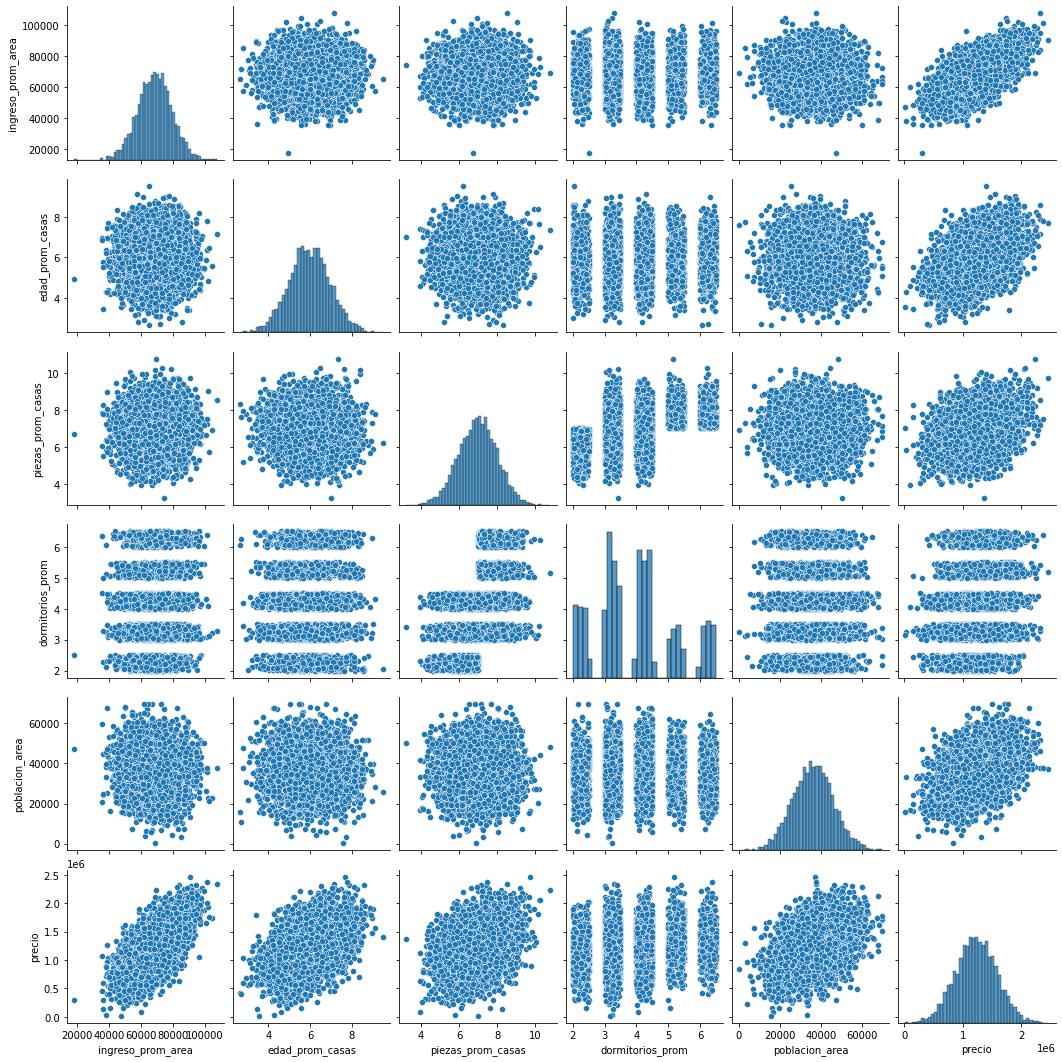

In [16]:
# De la librería Seaborn, existen opciones para presentar gráficos recomendables, tales como:
sns.pairplot(df, palette='coolwarm');

In [17]:
df.columns

Index(['ingreso_prom_area', 'edad_prom_casas', 'piezas_prom_casas',
       'dormitorios_prom', 'poblacion_area', 'precio'],
      dtype='object')

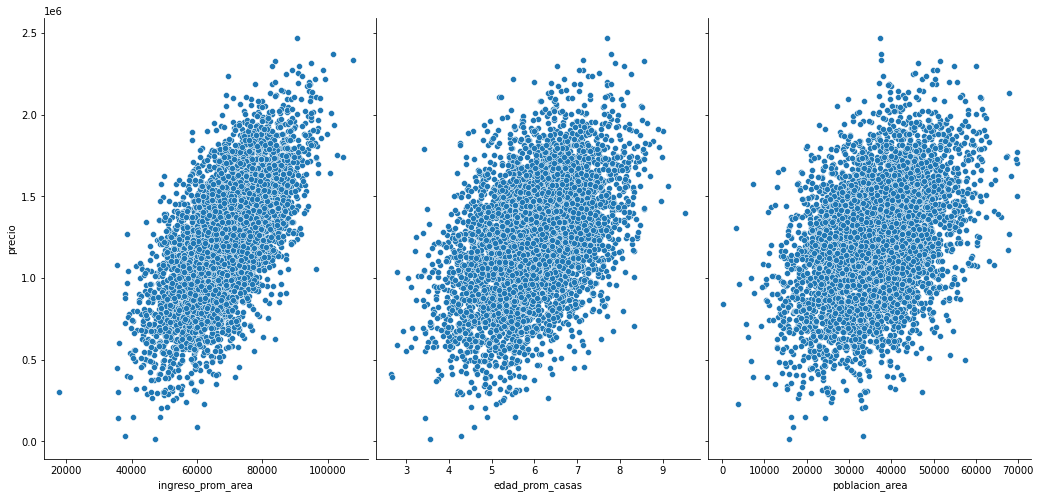

In [18]:
# Visualisando las correlaciones usando scatterplots de la librería Seaborn, se eligen algunas columnas para inspeccionar.
sns.pairplot(df, x_vars=['ingreso_prom_area', 'edad_prom_casas', 'poblacion_area'], y_vars='precio',height=7, aspect=0.7, kind='scatter')

In [19]:
df.corr().precio.sort_values(ascending=False)

precio               1.000000
ingreso_prom_area    0.639734
edad_prom_casas      0.452543
poblacion_area       0.408556
piezas_prom_casas    0.335664
dormitorios_prom     0.171071
Name: precio, dtype: float64

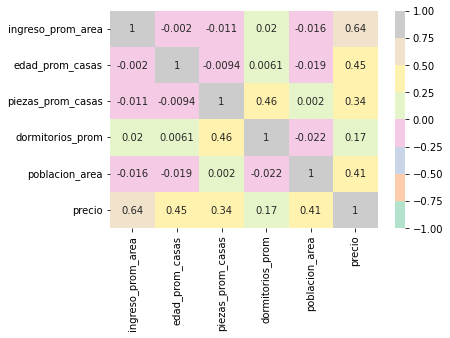

In [20]:
# Coeficiente de correlación y Heatmap
sns.heatmap(df.corr(),annot=True, vmin=-1, vmax=1,cmap='Pastel2',);

# Colores a probar:
# coolwarm
# Pastel2
# jet
# tab20c
# viridis


# Más opciones de colores en la documentación de matplotlib
# https://matplotlib.org/stable/tutorials/colors/colormaps.html


<Axes: xlabel='precio', ylabel='Density'>

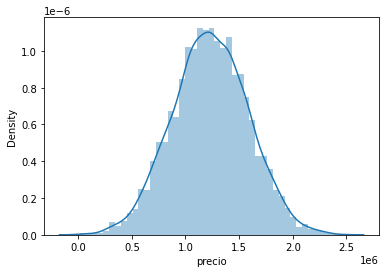

In [21]:
# Analisis de la distribución de la variable objetivo:
# Price_average = np.average(df.Price)

sns.distplot(df.precio)
# plt.axvline(df['precio'].mean(), color='red');

#plt.avxline('0.639734', color='red', linestyle='--')
#sns.distplot(data.Price,kde=True, rug=True,norm_hist=True, bins=10);

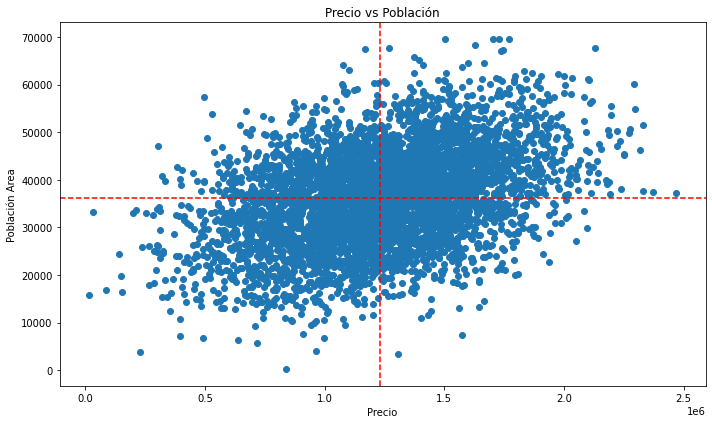

In [22]:
# Otra de las librerías favoritas para mostrar datos es matplotlib

plt.figure(figsize=(10, 6))
plt.scatter(df['precio'], df['poblacion_area'])
plt.xlabel('Precio')
plt.ylabel('Población Area')
plt.title('Precio vs Población')

# Se agrega una línea vertical en el promedio de la población
plt.axvline(df['precio'].mean(), color='red', linestyle='--')
# Se agrega una línea horizontal en el promedio del precio
plt.axhline(df['poblacion_area'].mean(), color='red', linestyle='--')





plt.tight_layout()
plt.show();






Text(0.1, 2, 'Promedio: 1232072.2')

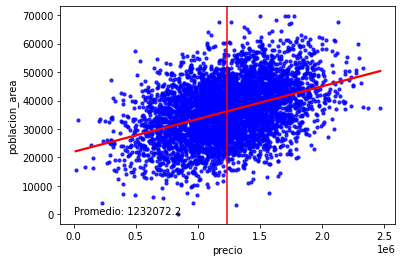

In [23]:
# Agregamos una línea de regresión
sns.regplot(x='precio', y='poblacion_area', data=df, color='blue',line_kws={'color': 'red'}, fit_reg=True, ci=None, scatter_kws={"s": 10},
            scatter=True, label='Regresión lineal', marker='o', order=1);

# Agregamos una linea vertical en el promedio de la variable 'precio'
plt.axvline(df['precio'].mean(), color='red');

# Creamos el objeto promedio
precio_prom = df.precio.mean()

# Se agrega una caja con el valor del promedio
plt.text(.1, 2,'Promedio: ' + str(round(precio_prom, 1)))



### Regresión Lineal Simple (Primer acercamiento)

* Usaremos Numpy, el método polyfit
* Revisar documentación de la página oficial siempre

In [36]:
# Definiremos una función que nos permita calcular la pendiente y la ordenada al origen de una recta
# Beta 1, Beta 0 = np.polyfit(x, y, clase 1 (regresión lineal))
b1, b0 = np.polyfit(df['poblacion_area'], df['precio'], 1)
print('Pendiente: {0:1f}'.format(b1))
print('Ordenada al origen: {0:1f}'.format(b0))

Pendiente: 14.534895
Ordenada al origen: 706439.259416


### Gráfico Matplotlib con la regresión

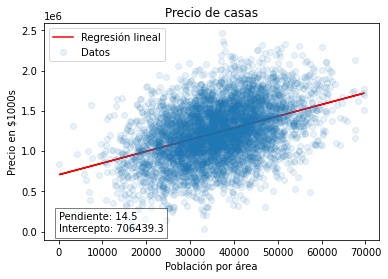

In [95]:
# Se crea un gráfico para visualizar la regresión lineal
#plt.plot(df['poblacion_area'], b0+b1*df['precio'], 'r-')

# Se crea un gráfico para visualizar la regresión lineal
plt.plot(df['poblacion_area'], b0+b1*df['poblacion_area'], 'r-')

plt.plot(df['poblacion_area'], df['precio'], 'o', alpha=0.1)

# Se agrega información de la pendiente y el intercepto en un box
plt.text(.9,.5,'Pendiente: {:.1f}\nIntercepto: {:.1f}'.format(b1, b0),
            bbox=dict(facecolor='white', alpha=0.5))


# Se agrega la legenda al gráfico
plt.legend(['Regresión lineal', 'Datos'])


plt.title('Precio de casas')
plt.xlabel('Población por área')
plt.ylabel('Precio en $1000s')
plt.show();





## Introducción a Python
### Funciones Estadísticas Clásicas
   * median
   * average
   * mean
   * std
   * var





***Link a consultar:*** https://numpy.org/doc/stable/reference/routines.statistics.html





In [25]:
# np.median(df.Ventas)
# np.average(df.Ventas)
# np.mean(df.Ventas)
# np.std(df.Ventas)
# np.var(df.Ventas)

In [26]:
# df.Ventas.median()
# df.Ventas.average()
# df.Ventas.mean()
# df.Ventas.std()
# df.Ventas.var()